In [6]:
import pandas as pd
import numpy as np
from ISLP import load_data
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/Users/happyeveryday/Downloads/Celebrity_recognition_project/western_celebs_results.csv')  # Replace with your file path

# Preprocess the data
data['Earnings'] = data['Earnings'].replace({'\$': '', ' million': ''}, regex=True).astype(float) * 1e6
data['avg_correct_confidence'] = data['avg_correct_confidence'].fillna(0)  # Replace NaN with 0

# Define the independent variable (Earnings) and add a constant to it
X = sm.add_constant(data['Earnings'])

# Define the dependent variable (avg_correct_confidence)
y = data['avg_correct_confidence']

# Create the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     avg_correct_confidence   R-squared:                       0.006
Model:                                OLS   Adj. R-squared:                 -0.031
Method:                     Least Squares   F-statistic:                    0.1569
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):              0.695
Time:                            18:34:38   Log-Likelihood:                -139.63
No. Observations:                      29   AIC:                             283.3
Df Residuals:                          27   BIC:                             286.0
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

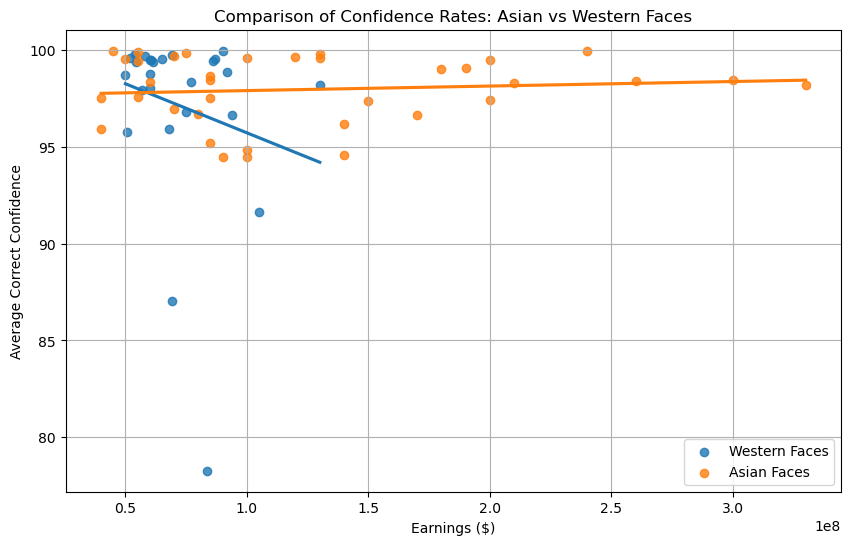

In [17]:
data_western = pd.read_csv('/Users/happyeveryday/Downloads/Celebrity_recognition_project/western_celebs_results.csv')  
data_asian = pd.read_csv('/Users/happyeveryday/Downloads/Celebrity_recognition_project/chinese_celebs_results.csv')  

# Preprocess both datasets (assuming similar preprocessing is required)
# Example: Converting 'Earnings' from string to float
data_western['Earnings'] = data_western['Earnings'].replace({'\$': '', ' million': ''}, regex=True).astype(float) * 1e6
data_asian['Earnings'] = data_asian['Earnings'].replace({'\$': '', ' million yuan': ''}, regex=True).astype(float) * 1e6

# Create the plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Earnings', y='avg_correct_confidence', data=data_western, ci=None, label='Western Faces')
sns.regplot(x='Earnings', y='avg_correct_confidence', data=data_asian, ci=None, label='Asian Faces')

plt.title('Comparison of Confidence Rates: Asian vs Western Faces')
plt.xlabel('Earnings ($)')
plt.ylabel('Average Correct Confidence')
plt.legend()
plt.grid(True)
plt.show()

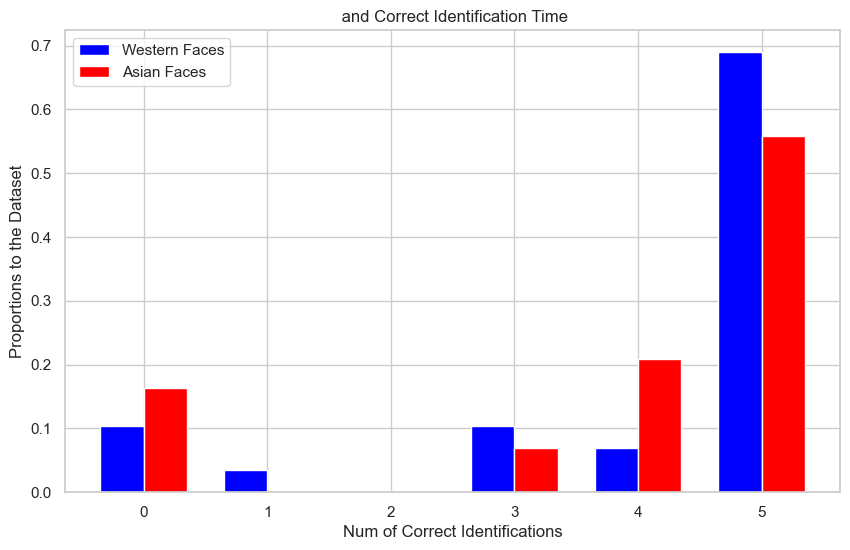

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Assuming data_western and data_asian are your datasets
percentage_data = data_western['correct'].value_counts(normalize=True).sort_index()
percentage_data_asian = data_asian['correct'].value_counts(normalize=True).sort_index()

# Ensuring all correct values from 0 to 5 are included
all_values = np.arange(0, 6)
percentage_data = percentage_data.reindex(all_values, fill_value=0).sort_index()
percentage_data_asian = percentage_data_asian.reindex(all_values, fill_value=0).sort_index()

# Setting up the positions for the bars
bar_width = 0.35
index = np.arange(len(all_values))  # Length should be 6 as we are considering 'correct' values from 0 to 5

# Creating the barplot with Matplotlib
plt.bar(index, percentage_data, bar_width, label='Western Faces', color='blue')
plt.bar(index + bar_width, percentage_data_asian, bar_width, label='Asian Faces', color='red')

# Additional plot settings
plt.title('Proportion and Num of Correct Identification ')
plt.xlabel('Num of Correct Identifications')
plt.ylabel('Proportions to the Dataset')
plt.xticks(index + bar_width / 2, all_values)  # Set x-ticks to be in the middle of the grouped bars
plt.legend()

# Display the plot
plt.show()
